In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from bs4 import BeautifulSoup
import re
from IPython.display import Image

#### At first ids of books from the list were gathers from their respective urls

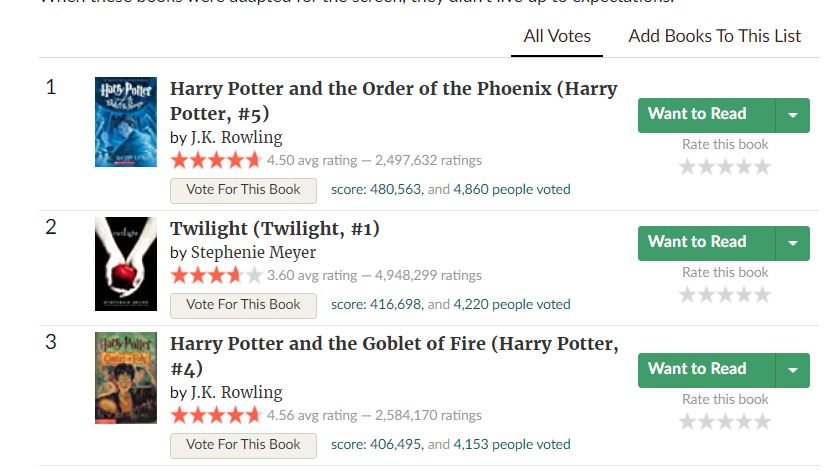

In [2]:
Image(filename='images/book_list.jpg') 

#### A Typical book Id is present n the URL

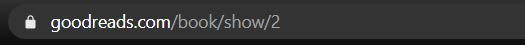

In [3]:
Image(filename='images/url_id.jpg')

##### This code was used to scrape the urls of all the books in the list  of these two urls

In [4]:
base_url_m_g_b='https://www.goodreads.com/list/show/104.The_MOVIE_was_BETTER_than_the_BOOK'
base_url_b_g_m='https://www.goodreads.com/list/show/429.The_BOOK_was_BETTER_than_the_MOVIE'


In [7]:
def get_data(url):
    with urllib.request.urlopen(url) as f:
        data = f.read().decode('utf-8')
    soup = BeautifulSoup(data)
    data = []
    tables = soup.find_all('table', attrs={'class':"tableList js-dataTooltip"})
    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            for items in cols:
                a_tag=items.find('a')
                try:
                    hreef=a_tag.attrs['href']
                    data.append(hreef)
                except:
                    pass
    return data

##### Each url had data across different number of pages  so we had to make two lists

In [5]:
pages_m_g_b=[i for i in range(2,12)]
pages_b_g_m=[i for i in range(2,17)]

##### Then we loop over the pages

In [8]:
full_data_m_g_b=[]
joined_data_m_g_b=[]
for page in pages_m_g_b:
    full_data_m_g_b.append(get_data(base_url_m_g_b+"?page="+str(page)))
for i in full_data_m_g_b:
    joined_data_m_g_b=joined_data_m_g_b+i
    
joined_data_m_g_b=set(joined_data_m_g_b)
joined_data_m_g_b.remove('#')
joined_data_m_g_b=list(joined_data_m_g_b)
data_id=[items.split("/")[-1] for items in joined_data_m_g_b]
data_m_g_b=[items.replace(".","-").split("-")[0] for items in data_id]

In [9]:
data_m_g_b[0:5]

['455373', '439288', '70787', '25431123', '539519']

##### These are the book ids of some of the books that were turned into movies

In [ ]:
df_total=pd.DataFrame()
df_total['book_id']=total_df
df_total['Movie']="yes"

##### The dataframe was then made into a csv .

In [ ]:
df_total.to_csv('book_to_movies_ids.csv')

In [8]:
book_2_movies_id = pd.read_csv("data/book_to_movies_ids.csv",error_bad_lines = False)

In [13]:
book_2_movies_id.head(5)

,Unnamed: 0,book_id,Movie
0,0,6892870,yes
1,1,8128,yes
2,2,12067,yes
3,3,31122,yes
4,4,498153,yes


In [5]:
def get_data(url):
    with urllib.request.urlopen(url) as f:
        data = f.read().decode('utf-8')
    d = BeautifulSoup(data)
    try:
        title=d.find(id="bookTitle",itemprop="name").text.replace('\n',"").replace(" ","")
    except:
        title='Unavailable'
    try:
        author=d.find("span", itemprop="name").text
    except:
        author='Unavailable'
        
    try:
        no_reviwes=d.find("meta", itemprop="reviewCount")['content']
    except:
        no_reviwes="Unavailable"
        
    try:
        no_ratings=d.find("meta", itemprop="ratingCount")['content']
    except:
        no_ratings="Unavailable"
        
    try:  
        rating=d.find("span", itemprop="ratingValue").text.replace('\n',"").replace(" ","")
    except:
        rating="Unavailable"
        
    try:  
        num_pages=d.find("span", itemprop="numberOfPages").text.replace('\n',"").replace(" ","")
    except:
        num_pages="Unavailable" 
    try:
        description=d.find("div", id="description").text.split("\n")[2]
    except:
        description="No description provided ."
    genre=[]
    for div in d.findAll('a', {'class': 'actionLinkLite bookPageGenreLink'}):
        genre.append(div.text)
        break
    details=d.find("div", id="details").text
    
    try:
        isbn=details.split('ISBN')[1].split('\n')[2].replace(" ","")
    except:
        isbn="Unavailable"
    try:
        language_code=details.split('Edition Language')[1].split('\n')[1]
    except:
        language_code="Unavailable"
        
    try:
        publisher=details.split('by')[1].split('\n')[0]
    except:
        publisher="Unavailable"
        
    try:
        year=details.split('Published')[1].split("\n")[1].replace(' ','')
    except:
        year="Unavailable"
        
    try:
        awards_uncl=re.findall(r'\(.*?\)', details.split('Literary Awards')[1])
        for items in awards_uncl:
            if len(items) != 6:
                awards_uncl.remove(items)
        awards=len(awards_uncl)
    except Exception as e:
        print(e)
        awards=0
    context={
        'title':title,
        'author':author,
        'number_of_ratings':no_ratings,
        'rating':rating,
        'description':description,
        "ISBN":isbn,
        'publisher':publisher,
        'year':year,
        'awards':awards,
        'num_pages':num_pages,
        'genre':genre,
        'no_reviwes':no_reviwes,
        'language_code':language_code
    }
    return context

#### The Scrapes information from a book page

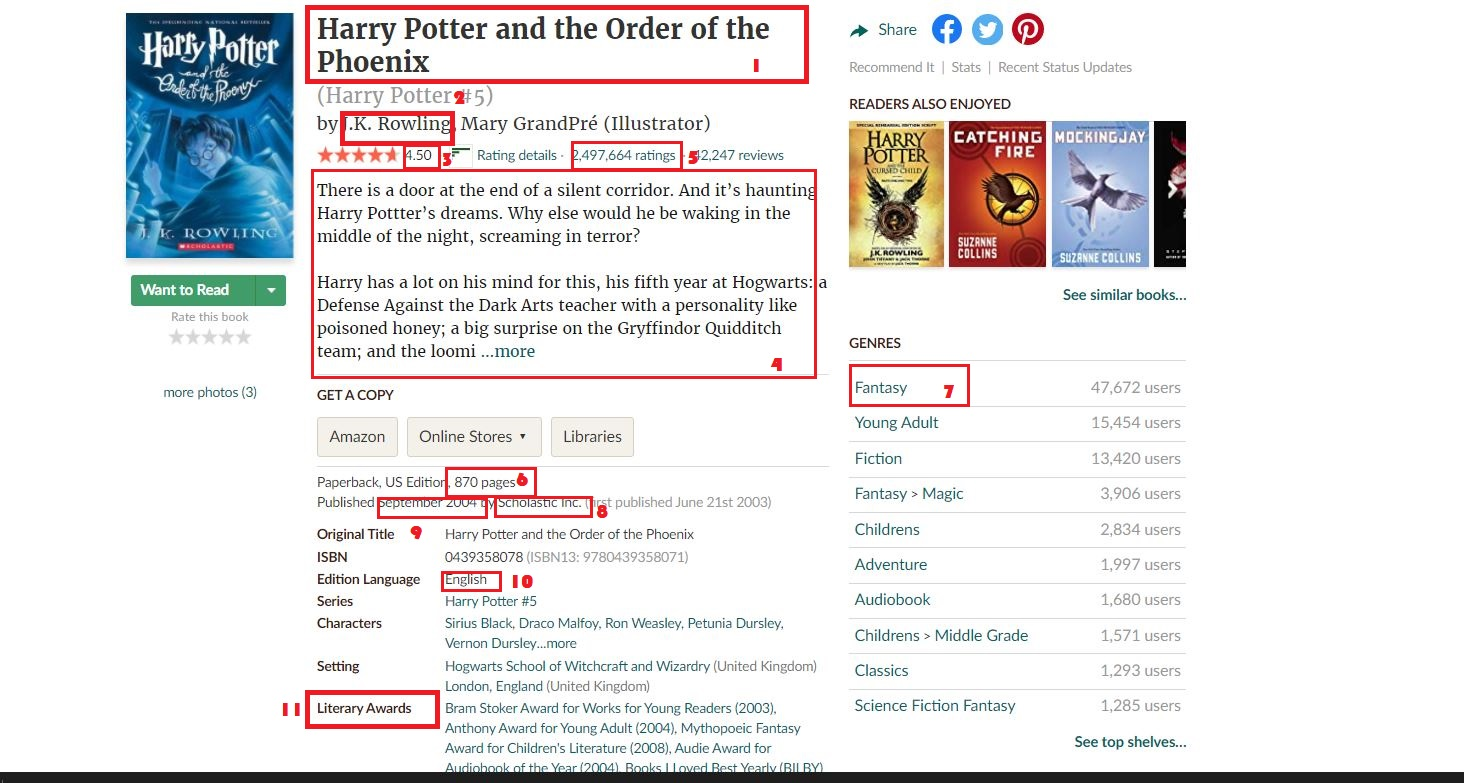

In [4]:
Image(filename='images/individual_book.jpg')

* 1:Title
* 2:Author
* 3:Rating
* 4:Description
* 5:Number of Ratings
* 6:Pages
* 7:Genre
* 8:Publisher
* 9:Date
* 10:Language
* 11:Awards

##### 2 is the book_id for Harry Potter and the Order of the Phoenix . 

In [6]:
get_data("https://www.goodreads.com/book/show/2")

{'title': 'HarryPotterandtheOrderofthePhoenix',
 'author': 'J.K. Rowling',
 'number_of_ratings': '2497636',
 'rating': '4.50',
 'description': 'There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all.',
 'ISBN': '0439358078',
 'publisher': ' Scholasti

In [10]:
book_2_movies_id.drop_duplicates(subset=['book_id'], inplace=True)

In [11]:
book_2_movies_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2319
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1969 non-null   int64 
 1   book_id     1969 non-null   int64 
 2   Movie       1969 non-null   object
dtypes: int64(2), object(1)
memory usage: 61.5+ KB


In [12]:
ids=book_2_movies_id['book_id'].to_list()

In [13]:
new_df=pd.DataFrame()

##### We first try to read the records from "new_data.csv" if its not present we create a new array for each columns.

In [17]:
count=0
try:
    scrape_df=pd.read_csv('data/GoodReads_Movies_from_book.csv')
    title=scrape_df['title'].to_list()
    author=scrape_df['author'].to_list()
    no_reviwes=scrape_df['no_reviwes'].to_list()
    language_code=scrape_df['language_code'].to_list()
    number_of_ratings=scrape_df['number_of_ratings'].to_list()
    rating=scrape_df['rating'].to_list()
    publisher=scrape_df['publisher'].to_list()
    num_pages=scrape_df['num_pages'].to_list()
    description=scrape_df['description'].to_list()
    year=scrape_df['year'].to_list()
    awards=scrape_df['awards'].to_list()
    genre=scrape_df['genre'].to_list()
    book_id=scrape_df['book_id'].to_list()
    
except Exception as e:
    print(e)
    language_code=[]
    num_pages=[]
    title=[]
    author=[]
    number_of_ratings=[]
    rating=[]
    description=[]
    publisher=[]
    awards=[]
    no_reviwes=[]
    year=[]
    genre=[]
    book_id=[]


###### we loop over the ids and format the url to get to the page of the individual book append the data to the array . finally after every 10 entries we save it to a csv, names "new_data.csv"

In [19]:
for items in ids:
    count+=1
    exc=1
    if items in book_id:
        continue
    else:
        try:
            book_data=get_data(f'https://www.goodreads.com/book/show/{items}')
        except Exception as e:
            if exc==1:
                pass
            print(e)
            print(items)
            
        title.append(book_data['title'])
        description.append(book_data['description'])
        awards.append(book_data['awards'])
        genre.append(book_data['genre'])
        language_code.append(book_data['language_code'])
        num_pages.append(book_data['num_pages'])
        author.append(book_data['author'])
        number_of_ratings.append(book_data['number_of_ratings'])
        rating.append(book_data['rating'])
        no_reviwes.append(book_data['no_reviwes'])     
        publisher.append(book_data['publisher'])
        year.append(book_data['year'])       
        book_id.append(items)

        
        print(book_data['title'],"_ done_",items)
    if count%10==0:
        new_df=pd.DataFrame({'title':title,'description':description,'awards':awards,'genre':genre,'book_id':book_id,
                            'language_code':language_code,'num_pages':num_pages,'author':author,
                             'number_of_ratings':number_of_ratings,'rating':rating,'publisher':publisher,'year':year, 'no_reviwes':no_reviwes})
        new_df.to_csv('data/GoodReads_Movies_from_book.csv')
        print("saved_csv_entryno_",items)

GodsandGenerals _ done_ 29925
list index out of range
DeathComestoPemberley _ done_ 12875355
list index out of range
TheScarletPimpernel _ done_ 136116
list index out of range
TheLostWhale:TheTrueStoryofanOrcaNamedLuna _ done_ 16044943
list index out of range
TheThirdMan&TheFallenIdol-TheNewWindmillSeries _ done_ 15758997
list index out of range
ForrestGump _ done_ 993830
list index out of range
APatchofBlue _ done_ 1383176
list index out of range
TheSea-Hawk _ done_ 236888
list index out of range
Nightfall _ done_ 3934321
list index out of range
Metropolis _ done_ 1043987
saved_csv_entryno_ 1043987
list index out of range
WhoCensoredRogerRabbit? _ done_ 765430
list index out of range
Psycho _ done_ 156427
list index out of range
Nemesis _ done_ 6129801
list index out of range
TheHorsemanontheRoof _ done_ 143820
TheAlienist _ done_ 819207
list index out of range
BraveNewWorld _ done_ 13536832
list index out of range
20,000LeaguesUndertheSea:AudioCD _ done_ 23403044
list index out of ra